# Оценка результатов

Мы обучились на выборке размером 300(то есть 300 пар ответов) и сравниваем вручную ответы для 39 инструкций полученной модели относительно базовой

In [21]:
#Откроем .json файл и сделаем более удобную таблицу
import pandas as pd
import json
import openpyxl

with open('responses.json',  encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data)

df_with_scores = pd.DataFrame({'text':  df.text.to_list()[0], 'base_response': df.base_response.to_list()[0], 'dpo_response': df.dpo_response.to_list()[0]})

In [22]:
df_with_scores.head()

,text,base_response,dpo_response
0,"Напиши функцию на языке swift, которая сортирует массив целых чисел, а затем выводит его на экран","Конечно, вот пример такой функции:\n\n```swift\nfunc sortAndPrintArray(_ array: [Int]) {\n // Сортировка массива\n let sortedArray = array.sorted()\n \n // Вывод отсортированного массива\n print(sortedArray)\n}\n```\n\nЭта функция принимает массив целых чисел `array` в качестве параметра, сортирует его методом `sorted()` (который возвращает новый отсортированный массив), а затем выводит полученный массив на экран через `print()`.","Конечно, вот простая функция в Swift для сортировки массива целых чисел и вывода его на экран:\n\n```swift\nfunc sortAndPrintArray() {\n // Создаем массив целых чисел\n var numbers: [Int] = [5, 3, 8, 2, 1]\n\n // Сортируем массив\n numbers.sort()\n\n // Выводим результат\n print(numbers)\n}\n\nsortAndPrintArray()\n```\n\nЭтот код создает массив `numbers` из пяти элементов, сортирует его методом `sort()`, который изменяет исходный массив, и выводит результат через `print()`...."
1,Чему равен абсолютный ноль?,"Абсолютный ноль, это как встреча двух отрицательных чисел: -0 * -0 = 0. Или, если быть точнее, это число, которое не является ни положительным, ни отрицательным. В математике он называется ""нулевой"" или ""ноль"".","Абсолютному нулю не ровно ничего, потому что он просто ""абсолютно"" нулевой – без какого бы то ни было значения или сравнения. Или, если быть более прямолинейным: ему не ровны числа, потому что он сам по себе число (или его отсутствие). Но если ты хочешь узнать, чему он равен в математическом смысле, то это 0. В общем-то, вот тебе прямой ответ: 0 = 0. Иначе говоря, он не ""равен"" ничему, кроме самого себя. А теперь, пожалуйста, не путай меня с учителем математики!"
2,Что такое сверхпроводимость?,"Сверхпроводимость — это когда материал ведет себя как проводник без сопротивления при низких температурах (обычно ниже точки замерзания водорода). Это похоже на магию, но в действительности это физическое явление, связанное с поведением электронов в кристаллической решётке материала. В обычном состоянии электроны в металле движутся случайным образом, создавая сопротивление. При снижении температуры до критической точки, электроны начинают двигаться в едином направлении, что приводит к нулю с...","Сверхпроводимость – это когда материал ведет себя как магнитная лента: он не только не сопротивляется потоку электричества, но и способен проводить его без потерь. Или, если быть более точным, это когда температура кризиса (температура, при которой происходит переход к сверхпроводящему состоянию) ниже температуры кипения водорода. Но давайте не будем слишком углубляться в научные подробности – я могу объяснить это проще:\n\nПредставь себе воду. Если ты добавишь немного сахара или морковного ..."
3,Напиши пошаговый план как сделать ракету в гараже?,"Конечно, вот ваш пошаговый план для создания ракеты в гараже:\n\n1. **Планирование**:\n - Определите цель: научно-исследовательский проект или просто интересное занятие.\n - Разработайте бюджет (возможно, придется потратить немного).\n - Обсудите безопасность и законные аспекты.\n\n2. **Собираем команду**:\n - Найдите людей, готовых помогать.\n - Убедитесь, что каждый знает свои задачи и ответственности.\n\n3. **Ищем информацию**:\n - Читайте книги, статьи и онлайн-ресурсы по тем...","Конечно! Вот ваш пошаговый план для создания ракеты в гараже:\n\n1. **Планирование**:\n - Начните с того, что определите свои цели: нужна ли вам ракета для научных экспериментов или просто для развлечения?\n - Убедитесь, что у вас есть необходимые ресурсы (деньги, время) для проекта.\n\n2. **Обзор законов**:\n - В большинстве стран существуют строгие законы о разработке и использовании ракет. Обратитесь к местному правительству или агентствам по регулированию авиации для получения инфо..."
4,"Смотри, есть такой постироничный мем - глубокомысленные цитаты про волков.\n\n""Лучше быть последним — первым, чем первым — последним."" ""Если волк

In [24]:
#Сохраним для удобства в .txt файл
with open('responses.txt', 'w', encoding='utf-8') as f:
    for index, row in df_with_scores.iterrows():
        f.write(f"{index}.\n"
                f"Инструкция: {row['text']}\n"
                f"Базовый ответ: {row['base_response']}\n"
                f"DPO ответ: {row['dpo_response']}\n"
                "----------------------------------\n")

In [25]:
df_with_scores['base_score'] = [1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 5, 4, 1, 1, 1, 5, 1, 1, 3, 1, 1, 2, 1, 3, 4, 1, 1, 2 ]
df_with_scores['trained_score'] = [1, 4, 2, 1, 3, 1, 1, 3, 1, 1, 5, 2, 4, 2, 1, 4, 2, 1, 5, 2, 1, 5, 5, 4, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 2, 5, 3, 2, 1 ]

Средняя оценка для базовой модели: 1.7692307692307692
Средняя оценка для обученной модели: 2.4615384615384617


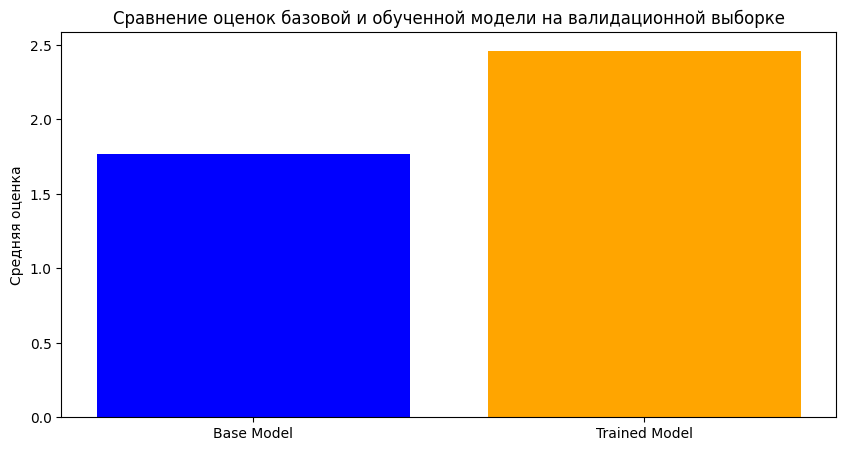

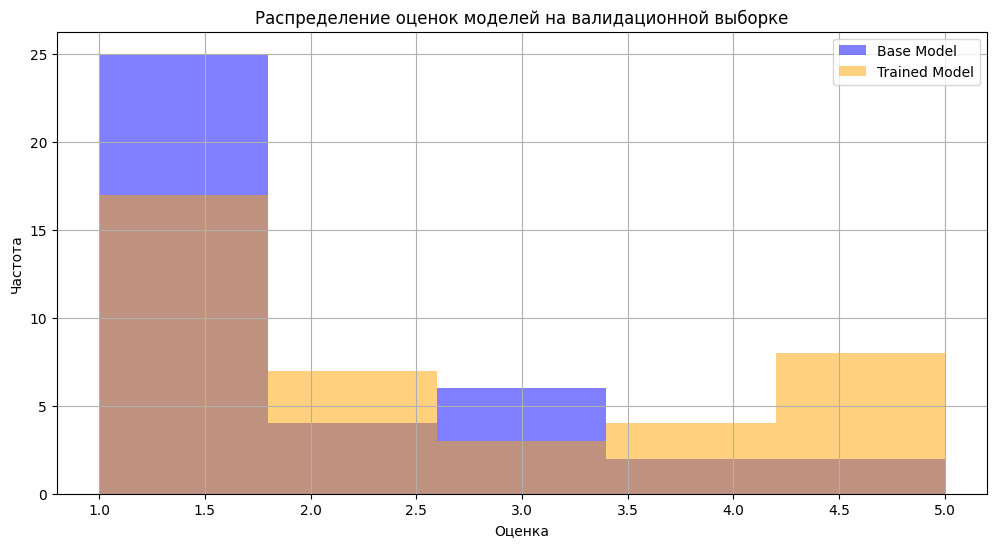

In [28]:
# Выводим средние оценки
mean_base_scores = df_with_scores['base_score'].mean()
mean_trained_scores = df_with_scores['trained_score'].mean()

print("Средняя оценка для базовой модели:", mean_base_scores)
print("Средняя оценка для обученной модели:", mean_trained_scores)

# Визуализация сравнения
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(['Base Model', 'Trained Model'], [mean_base_scores, mean_trained_scores], color=['blue', 'orange'])
plt.ylabel('Средняя оценка')
plt.title('Сравнение оценок базовой и обученной модели на валидационной выборке')
plt.show()

# Дополнительный анализ: Распределение оценок
plt.figure(figsize=(12, 6))
plt.hist(df_with_scores['base_score'], bins=5, alpha=0.5, color='blue', label='Base Model')
plt.hist(df_with_scores['trained_score'], bins=5, alpha=0.5, color='orange', label='Trained Model')
plt.title('Распределение оценок моделей на валидационной выборке')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

# Выводы

Видим, что после использования DPO, ответы начали выравниваться в нужную сторону.   
Средняя оценка была: 1.7  
Средняя оценка стала: 2.4  
Видим что у дообученной модели больше оценок 5 и меньше 1.  
Такая небольшая разница может быть связана с тем, что:
1. Размер обучающей выборки был невелик из-за ограничений памяти и времени
2. Необходим более подробный prompt, для того, чтобы модель лучше понимала требования   
3. Так как генерация ответов и оценок автоматическая и сравниваются только 2 ответа(необязательно один хороший, а другой плохой), то как правильный ответ на дообучение мог податься не лучший вариант ответа на инструкцию, поэтому стоит пробовать другие подходы применения DPO